# Predicting Titanic Passenger Survival Using Support Vector Machines (SVM)
#### GITHUB Repository Link: https://github.com/rk24aao/PredictingTitanic-Passenger-Survival
#### Data set link: https://www.kaggle.com/datasets/yasserh/titanic-dataset 

# Load the Dataset

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
file_path = 'Titanic-Dataset.csv'  # Update with correct path if necessary
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Data Preprocessing

In [2]:
from sklearn.preprocessing import LabelEncoder

# Fill missing Age with median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Initialize LabelEncoder
le = LabelEncoder()

# Convert 'Sex' into 0 (female) and 1 (male)
df['Sex'] = le.fit_transform(df['Sex'])

# Show data after handling missing values
print("\nData after handling missing values:")
print(df.isnull().sum())

# Drop irrelevant columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Embarked'], inplace=True)



Data after handling missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Exploratory Data Analysis (EDA)


Statistical Summary:
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare  
count  891.000000  
mean    32.204208  
std     49.693429  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max    512.329200  


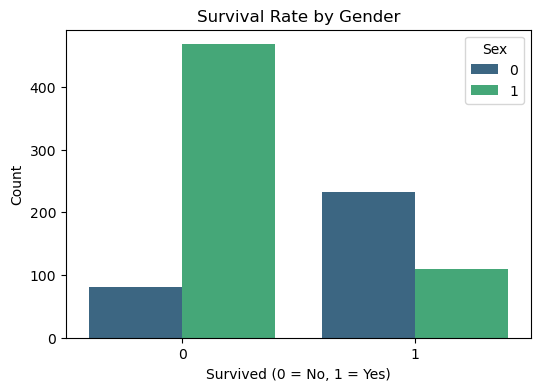

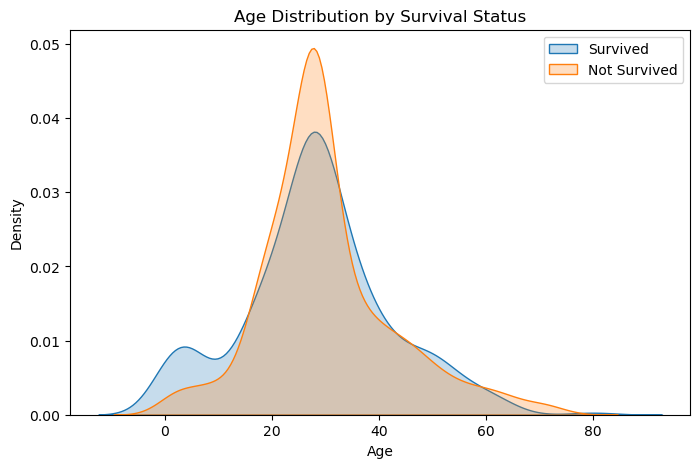

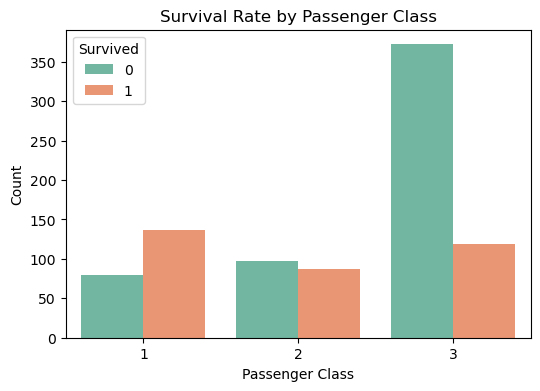

In [3]:
# Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check data types and overall stats
print("\nStatistical Summary:")
print(df.describe())

# 1. Survival Rate by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=df, palette='viridis')
plt.title('Survival Rate by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 2. Age Distribution by Survival Status
plt.figure(figsize=(8, 5))
sns.kdeplot(df.loc[df['Survived'] == 1, 'Age'], label='Survived', shade=True)
sns.kdeplot(df.loc[df['Survived'] == 0, 'Age'], label='Not Survived', shade=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# 3. Survival Rate by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


# SVM implimentation

### Split the Data into Training and Test Sets

In [4]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (712, 6)
Test set size: (179, 6)


### Scale the Data

In [5]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Train the SVM Model

In [6]:
from sklearn.svm import SVC

# Initialize the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Fit the model
svm_model.fit(X_train, y_train)

print("SVM model trained successfully!")


SVM model trained successfully!


### Evaluate Model Performance

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test data
y_pred = svm_model.predict(X_test)

# Evaluate performance
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Confusion Matrix:
[[92 13]
 [21 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Accuracy Score: 0.8100558659217877


### Model Visualization

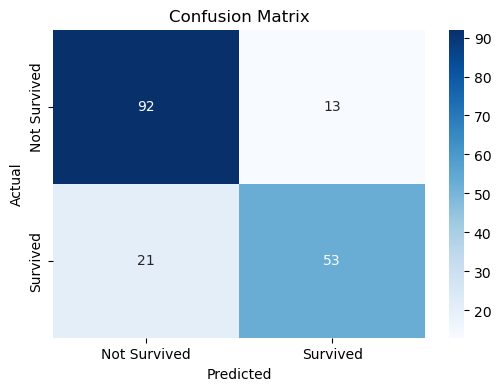

In [8]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



### Optimizing code with Hyperparameter Tuning

In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=1)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.824386880724909
